In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster

In [2]:
#读取文件
df = pd.read_table('stat_res_eh_vs_eo1.csv',sep=',')
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Acidovorax sp. MR-S7,2029.044169,0.038389,2.006764,0.019130,0.984738,0.988137
1,Acinetobacter sp. 1578804,1115.539469,-1.187839,1.752268,-0.677886,0.497844,0.773247
2,Actinomyces dentalis DSM 19115,3183.176031,-2.738705,1.985413,-1.379413,0.167767,0.445224
3,Actinomyces sp. ICM47,895.496360,3.949080,1.502581,2.628197,0.008584,0.078328
4,Actinomyces sp. oral taxon 180 str. F0310,3437.728398,-2.971263,2.036442,-1.459046,NaN,NaN


In [3]:
cut_off_pvalue = 0.0000001
cut_off_log2FC = 1

In [4]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import matplotlib as mpl
import math
%matplotlib inline

In [5]:
df.loc[(df.log2FoldChange>1)&(df.padj<0.05),'type']='up'
df.loc[(df.log2FoldChange<-1)&(df.padj<0.05),'type']='down'
df.loc[(abs(df.log2FoldChange)<=1)|(df.padj>=0.05),'type']='nosig'

In [6]:
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,type
0,Acidovorax sp. MR-S7,2029.044169,0.038389,2.006764,0.019130,0.984738,0.988137,nosig
1,Acinetobacter sp. 1578804,1115.539469,-1.187839,1.752268,-0.677886,0.497844,0.773247,nosig
2,Actinomyces dentalis DSM 19115,3183.176031,-2.738705,1.985413,-1.379413,0.167767,0.445224,nosig
3,Actinomyces sp. ICM47,895.496360,3.949080,1.502581,2.628197,0.008584,0.078328,nosig
4,Actinomyces sp. oral taxon 180 str. F0310,3437.728398,-2.971263,2.036442,-1.459046,NaN,NaN,NaN


In [7]:
df.type.value_counts()

nosig    68
down      3
up        3
Name: type, dtype: int64

In [8]:
df['p']=-df.padj.apply(math.log10)

In [9]:
df[['log2FoldChange','pvalue','type','padj','p']].head()

,log2FoldChange,pvalue,type,padj,p
0,0.038389,0.984738,nosig,0.988137,0.005183
1,-1.187839,0.497844,nosig,0.773247,0.111682
2,-2.738705,0.167767,nosig,0.445224,0.351422
3,3.949080,0.008584,nosig,0.078328,1.106084
4,-2.971263,NaN,NaN,NaN,NaN


In [10]:
df1=df[['log2FoldChange','groups','p']]
df1

,log2FoldChange,groups,p
0,0.038389,Acidovorax sp. MR-S7,0.005183
1,-1.187839,Acinetobacter sp. 1578804,0.111682
2,-2.738705,Actinomyces dentalis DSM 19115,0.351422
3,3.949080,Actinomyces sp. ICM47,1.106084
4,-2.971263,Actinomyces sp. oral taxon 180 str. F0310,NaN
...,...,...,...
104,1.110687,Streptomyces griseorubens,0.135898
105,4.243948,Tyzzerella nexilis DSM 1787,NaN
106,20.673165,Veillonella sp. 3_1_44,NaN
107,-3.184755,Veillonella sp. 6_1_27,NaN


In [11]:
df1.dropna(inplace=True)
df1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3264\2978808617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,groups,p
0,0.038389,Acidovorax sp. MR-S7,0.005183
1,-1.187839,Acinetobacter sp. 1578804,0.111682
2,-2.738705,Actinomyces dentalis DSM 19115,0.351422
3,3.949080,Actinomyces sp. ICM47,1.106084
5,3.832906,Actinomyces viscosus C505,0.636830
...,...,...,...
94,-2.167823,Shuttleworthia sp. MSX8B,0.351422
99,-4.319810,Streptococcus australis ATCC 700641,0.825711
101,-2.048996,Streptococcus dysgalactiae subsp. equisimilis ...,0.351422
104,1.110687,Streptomyces griseorubens,0.135898


In [12]:
df1.sort_values(by='p',ascending=False,inplace=True)
df1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3264\2804279978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,groups,p
89,-13.082912,Rhizobium vignae,12.277196
70,12.184582,Prevotella aurantiaca JCM 15754,11.090096
53,-10.767776,Mesorhizobium sp. LSJC265A00,6.000492
34,-10.526085,Eikenella corrodens CC92I,5.742020
76,8.354306,Prevotella intermedia 17,4.579583
...,...,...,...
39,0.142320,Fusobacterium nucleatum CTI-2,0.013529
32,0.157868,Dialister invisus CAG:218,0.013529
85,-0.093347,Prevotella sp. oral taxon 472 str. F0295,0.005578
82,-0.027551,Prevotella salivae DSM 15606,0.005183


In [13]:
#提取df1的前10行
df2=df1.head(5)
df2

,log2FoldChange,groups,p
89,-13.082912,Rhizobium vignae,12.277196
70,12.184582,Prevotella aurantiaca JCM 15754,11.090096
53,-10.767776,Mesorhizobium sp. LSJC265A00,6.000492
34,-10.526085,Eikenella corrodens CC92I,5.742020
76,8.354306,Prevotella intermedia 17,4.579583


In [ ]:
#提取df2的第0,1,,4,5行
df3=df2.iloc[[0,1,2,4,5]]
df3

,log2FoldChange,Sample,p
74,-11.671762,Prevotella multisaccharivorax,7.278025
95,-10.263547,Bifidobacterium dentium,6.297319
53,-11.929474,Pyramidobacter piscolens,6.297319
66,-11.773896,Porphyromonas asaccharolytica,6.117052


In [15]:
#df3删除含有Burkholderia cepacia的行
df4=df3[~df3.Sample.str.contains('Burkholderia cepacia')]
df4

,log2FoldChange,Sample,p
74,-11.671762,Prevotella multisaccharivorax,7.278025
95,-10.263547,Bifidobacterium dentium,6.297319
53,-11.929474,Pyramidobacter piscolens,6.297319
66,-11.773896,Porphyromonas asaccharolytica,6.117052


In [16]:
da1=df1
da1

,log2FoldChange,Sample,p
74,-11.671762,Prevotella multisaccharivorax,7.278025
95,-10.263547,Bifidobacterium dentium,6.297319
55,-12.096303,Saccharibacteria (TM7) [G-1] bacterium HMT 957,6.297319
47,-11.978153,Burkholderia cepacia,6.297319
53,-11.929474,Pyramidobacter piscolens,6.297319
...,...,...,...
195,-0.031915,Selenomonas sputigena,0.005662
134,-0.072001,Haemophilus pittmaniae,0.005662
89,-0.039543,Oribacterium sp. HMT 102,0.004715
306,-0.005415,Megasphaera micronuciformis,0.000945


In [17]:
#da1以log2FoldChange降序排序
da1.sort_values(by='log2FoldChange',ascending=False,inplace=True)
da1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2320\2529269924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,Sample,p
162,5.677310,Neisseria macacae,2.520807
259,5.054135,Rothia dentocariosa,3.979995
172,4.354581,Actinomyces massiliensis,2.715548
149,4.286979,Aggregatibacter paraphrophilus,0.913225
164,4.252600,Veillonella sp. HMT 780,0.913225
...,...,...,...
53,-11.929474,Pyramidobacter piscolens,6.297319
47,-11.978153,Burkholderia cepacia,6.297319
55,-12.096303,Saccharibacteria (TM7) [G-1] bacterium HMT 957,6.297319
40,-13.965039,Microbacterium flavescens,4.569274


In [18]:
#提取da1中log2FoldChange为正的部分
da2=da1[da1.log2FoldChange>0]
da2

,log2FoldChange,Sample,p
162,5.677310,Neisseria macacae,2.520807
259,5.054135,Rothia dentocariosa,3.979995
172,4.354581,Actinomyces massiliensis,2.715548
149,4.286979,Aggregatibacter paraphrophilus,0.913225
164,4.252600,Veillonella sp. HMT 780,0.913225
...,...,...,...
292,0.142356,Nanosynbacter sp. HMT-352,0.010479
90,0.104663,Acidipropionibacterium acidifaciens,0.007857
323,0.076824,Peptostreptococcaceae [G-1] [Eubacterium] sulci,0.010479
244,0.058591,Porphyromonas gingivalis,0.005713


In [19]:
#da2以p列降序排序
da2.sort_values(by='p',ascending=False,inplace=True)
da2

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2320\3536197406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,log2FoldChange,Sample,p
259,5.054135,Rothia dentocariosa,3.979995
172,4.354581,Actinomyces massiliensis,2.715548
162,5.677310,Neisseria macacae,2.520807
213,4.080501,Haemophilus sp. HMT 036,1.919801
293,3.453939,Neisseria elongata,1.575817
...,...,...,...
197,0.261922,Filifactor alocis,0.010479
63,0.446881,Mitsuokella sp. HMT 131,0.010479
90,0.104663,Acidipropionibacterium acidifaciens,0.007857
244,0.058591,Porphyromonas gingivalis,0.005713


In [20]:
#提取da2的前6行
da3=da2.head(5)
da3

,log2FoldChange,Sample,p
259,5.054135,Rothia dentocariosa,3.979995
172,4.354581,Actinomyces massiliensis,2.715548
162,5.677310,Neisseria macacae,2.520807
213,4.080501,Haemophilus sp. HMT 036,1.919801
293,3.453939,Neisseria elongata,1.575817


In [21]:
#将df3和da2合并
da3=pd.concat([df4,da3])
da3

,log2FoldChange,Sample,p
74,-11.671762,Prevotella multisaccharivorax,7.278025
95,-10.263547,Bifidobacterium dentium,6.297319
53,-11.929474,Pyramidobacter piscolens,6.297319
66,-11.773896,Porphyromonas asaccharolytica,6.117052
259,5.054135,Rothia dentocariosa,3.979995
172,4.354581,Actinomyces massiliensis,2.715548
162,5.677310,Neisseria macacae,2.520807
213,4.080501,Haemophilus sp. HMT 036,1.919801
293,3.453939,Neisseria elongata,1.575817


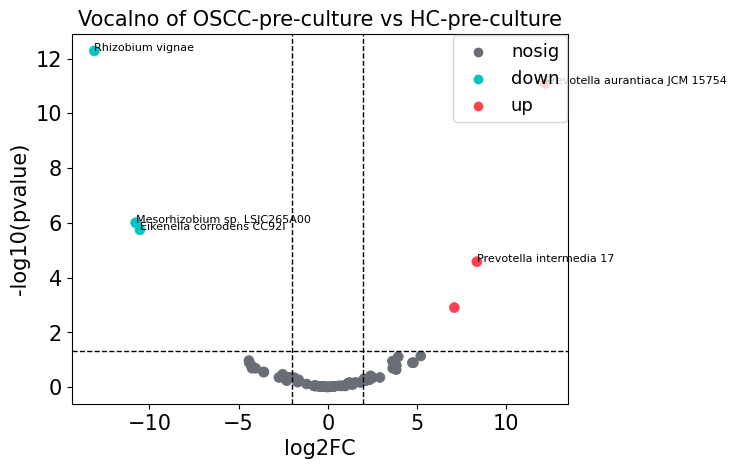

In [15]:
colors = ["#686d76","#01c5c4","#ff414d" ]
sns.set_palette(sns.color_palette(colors))
ax=sns.scatterplot(x='log2FoldChange', y='p',data=df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=50,#点大小
                )
ax.set_title("Vocalno of OSCC-pre-culture vs HC-pre-culture",fontsize=15)
for i, row in df2.iterrows():
    ax.text(row['log2FoldChange'], row['p'], row['groups'], horizontalalignment='left', size=8, color='black')

#Y轴在1.3的位置添加一条横的虚线
ax.axhline(y=1.3,ls="--",c="black",linewidth=1)
#X轴在-2和2的位置添加一条竖的虚线
ax.axvline(x=-2,ls="--",c="black",linewidth=1)
ax.axvline(x=2,ls="--",c="black",linewidth=1)
#纵坐标字体大小变大
ax.yaxis.set_tick_params(labelsize=15)
#横坐标字体大小变大
ax.xaxis.set_tick_params(labelsize=15)
ax.set_xlabel("log2FC",fontsize=15)
ax.set_ylabel("-log10(pvalue)",fontsize=15)
ax.legend(loc='center right', bbox_to_anchor=(1.016,0.88), ncol=1, fontsize=13)
fig = ax.get_figure()
plt.savefig('Vocalno HC-pre-culture vs OSCC-pre-culture1.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [79]:
#在图中显示down和up点在Genomic bins列的值
for i in range(df.shape[0]):
    if df.loc[i,'type']=='up' or df.loc[i,'type']=='down':
        ax.text(df.loc[i,'log2FoldChange'],df.loc[i,'p'],df.loc[i,'Genomic bins'],fontsize=8)

KeyError: 'Genomic bins'